## Project proposal:
**Can Serum Cholestoral and Age accurately predict the presence of heart disease?**

In [19]:
library(tidyverse)
library(tidymodels)
library(readr)
library(utils)

**Introduction**
 
 Heart disease is one of the crucial health issues that affect people worldwide, leading to significant concerns. Heart disease has been associated with death for a long period of time. Many patients  struggling with heart issues have received effective treatments, significantly improving their outcomes and reducing the mortality rate. As a result, identifying risky medical and demographic factors for early detection is significant. The dataset used for this project is called “Heart Disease” from UC Irvine Machine Learning Repository. It contains four databases and main features include sex, age, cp, chol, etc. The dataset contains 4 types from different regions: Cleveland, Hungary, Switzerland, and the VA Long Beach. Only "Cleveland" dataset will be used here, with each row represents observation of one patient. This project is aiming to predict the likelihood of heart disease by exploring specific factors, namely age and serum cholestoral. The target variable is heart disease, whether present or absent. The predictive question for this project is: “Can serum cholestoral and age accurately predict the presence of heart disease?” 

**Preliminary exploratory data analysis**

To begin with, we need to read the dataset into R by applying "read_csv" funciton. We then mutate a new column named "presc" to show the presence of heart disease("True" or "False"), and select the specific variables we need for analysis: “age”, “num”, “chol”, "presc". This step is necessary for cleaning and wrangling the data into tidy format. Afterwards, we will split data into train and test sets to “presc" column in order to make sure it contains proportional data for both training and testing sets. The splitting percentage of training set would be 75%, and only the training set will be used for further data modeling, including creating useful tables and plots.



In [25]:
# Read the data we need from web into R; the dataset I choose is "Cleveland" dataset.

heart_disease_data <- read_csv("data/heart_disease/processed.cleveland.data",
                               c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

heart_disease_data[ heart_disease_data == "?" ] <- NA

# Select necessary variables; this step is used for cleaning and wrangling the data into tidy format.
heart_disease_data1 <- heart_disease_data |>
  mutate(presc = ifelse(is.na(num), NA, (num > 0))) |>
  filter(!is.na(presc)) |>
  mutate(presc = as_factor(presc)) |>
  select(age, chol, num, presc)

# Display the first few rows as a table.
head(heart_disease_data1)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,chol,num,presc
<dbl>,<dbl>,<dbl>,<fct>
63,233,0,FALSE
67,286,2,TRUE
67,229,1,TRUE
37,250,0,FALSE
41,204,0,FALSE
56,236,0,FALSE


In [26]:
# Create training and testing sets
set.seed(1234)
heart_disease_split <- initial_split(heart_disease_data1, prop = 0.75, strata = presc)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

# Display both training and testing sets
head(heart_disease_train)
head(heart_disease_test)

age,chol,num,presc
<dbl>,<dbl>,<dbl>,<fct>
37,250,0,FALSE
41,204,0,FALSE
56,236,0,FALSE
57,192,0,FALSE
44,263,0,FALSE
52,199,0,FALSE


age,chol,num,presc
<dbl>,<dbl>,<dbl>,<fct>
63,233,0,FALSE
57,354,0,FALSE
53,203,1,TRUE
56,294,0,FALSE
48,275,0,FALSE
49,266,0,FALSE


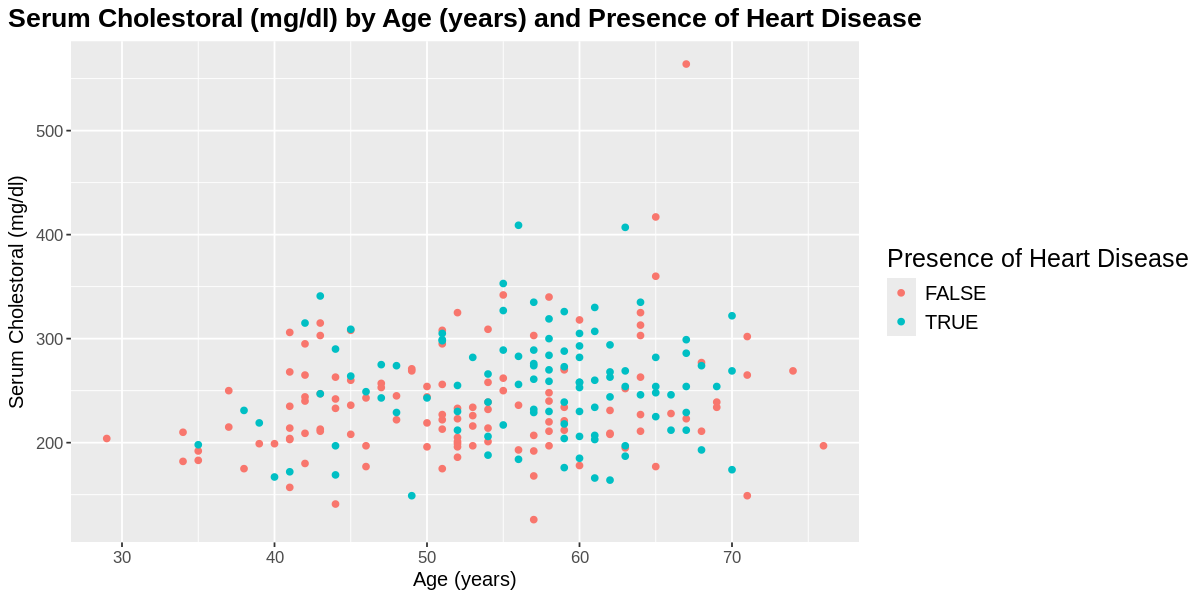

In [27]:
# Now, we can put test set aside, 
# and use only training set to create scatter plot in order to visualize the relationship between "Age" and "Serum Cholestoral". 

options(repr.plot.width = 10, repr.plot.height = 5)

heart_disease_gg <- ggplot(heart_disease_train, aes(x = age, y = chol, colour = presc)) +
    geom_point() +
    labs(colour = "Presence of Heart Disease") +
    xlab("Age (years)") + 
    ylab("Serum Cholestoral (mg/dl)") + 
    theme(text = element_text(size=15), 
          plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
         axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)) +
    labs(title = "Serum Cholestoral (mg/dl) by Age (years) and Presence of Heart Disease")

heart_disease_gg
    


**Methodology**

Knn classification is the algorithm that I will employ to predict the presence of heart disease. This algorithm is effective and straightforward to identify new observations by analysing quantitative data. The choice of value”k” is crucial, so we will perform cross-validation to find the optimal “k” number to balance data. Additionally, I will use a scatter plot to visualize the relationship between predictor variables(serum cholestoral and age). Plotting the confusion matrix is also necessary as it performs the overview of the model and tests the accuracy of the classification model. 

**Expected outcomes and significance**


This project expects to develop a model that can predict the presence of heart disease based on serum cholestoral type and age. The purpose of this model is to help the early detection of heart disease for health system, thereby helping more people and high risk patients who are struggling with the disease. 

